# My First Iteration of the Benson Challenges (More to come)

### Challenge 1: Create Pandas Dataframe (as dictionay: ok'd by reshama)

In [17]:
import pandas as pd
import numpy as np

f_list=['turnstile_160618.txt',
        'turnstile_160625.txt',
        'turnstile_160702.txt'
        ]

df = pd.concat(pd.read_csv(f, sep=",") for f in f_list)
df.rename(columns=lambda x: x.strip(), inplace=True)
df = df.set_index(['C/A', 'UNIT', 'SCP', 'STATION'])



LINENAME DIVISION        DATE      TIME     DESC  \
C/A  UNIT SCP      STATION                                                    
A002 R051 02-00-00 59 ST     NQR456      BMT  06/11/2016  00:00:00  REGULAR   
                   59 ST     NQR456      BMT  06/11/2016  04:00:00  REGULAR   
                   59 ST     NQR456      BMT  06/11/2016  08:00:00  REGULAR   
                   59 ST     NQR456      BMT  06/11/2016  12:00:00  REGULAR   
                   59 ST     NQR456      BMT  06/11/2016  16:00:00  REGULAR   

                            ENTRIES    EXITS  
C/A  UNIT SCP      STATION                    
A002 R051 02-00-00 59 ST    5703420  1930887  
                   59 ST    5703465  1930891  
                   59 ST    5703487  1930933  
                   59 ST    5703589  1931038  
                   59 ST    5703880  1931107

### Challenge 2: Convert to Timeseries

In [20]:
from dateutil import parser as dtparser
import datetime as dt

df_ts = df[['ENTRIES', 'DATE', 'TIME']]
df_ts['DATE_TIME'] = df_ts[['DATE', 'TIME']].apply(lambda x: ' '.join(x), axis=1)
df_ts['DATE_TIME'] = pd.to_datetime(df_ts['DATE_TIME'], format='%m/%d/%Y %X')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
df_ts.head()

ENTRIES           DATE-TIME
C/A  UNIT SCP      STATION                             
A002 R051 02-00-00 59 ST    5703420 2016-06-11 00:00:00
                   59 ST    5703465 2016-06-11 04:00:00
                   59 ST    5703487 2016-06-11 08:00:00
                   59 ST    5703589 2016-06-11 12:00:00
                   59 ST    5703880 2016-06-11 16:00:00

### Challenge 3:  Daily Total Entries


In [49]:
df_ts = pd.read_csv('df_ts_benson.csv')
# Convert to the Date String imported from csv back into a Date String
df_ts['DATE-TIME-S'] = pd.to_datetime(df_ts['DATE-TIME'])

In [86]:
df_ts[0:10]

,C/A,UNIT,SCP,STATION,ENTRIES,DATE-TIME,ENTRIES_COUNT,ENTRIES-COUNT,DATE-TIME-S,TIME-DELTA,DATE
0,A002,R051,02-00-00,59 ST,5703420,2016-06-11 00:00:00,NaN,NaN,2016-06-11 00:00:00,NaT,2016-06-11
1,A002,R051,02-00-00,59 ST,5703465,2016-06-11 04:00:00,45,45,2016-06-11 04:00:00,04:00:00,2016-06-11
2,A002,R051,02-00-00,59 ST,5703487,2016-06-11 08:00:00,22,22,2016-06-11 08:00:00,04:00:00,2016-06-11
3,A002,R051,02-00-00,59 ST,5703589,2016-06-11 12:00:00,102,102,2016-06-11 12:00:00,04:00:00,2016-06-11
4,A002,R051,02-00-00,59 ST,5703880,2016-06-11 16:00:00,291,291,2016-06-11 16:00:00,04:00:00,2016-06-11
5,A002,R051,02-00-00,59 ST,5704266,2016-06-11 20:00:00,386,386,2016-06-11 20:00:00,04:00:00,2016-06-11
6,A002,R051,02-00-00,59 ST,5704439,2016-06-12 00:00:00,173,173,2016-06-12 00:00:00,04:00:00,2016-06-12
7,A002,R051,02-00-00,59 ST,5704481,2016-06-12 04:00:00,42,42,2016-06-12 04:00:00,04:00:00,2016-06-12
8,A002,R051,02-00-00,59 ST,5704495,2016-06-12 08:00:00,14,14,2016-06-12 08:00:00,04:00:00,2016-06-12
9,A002,R051,02-00-00,59 ST,5704591,2016-06-12 12:00:00,96,96,2016-06-12 12:00:00,04:00:00,2016-06-12


In [131]:
# Create the Time Delta abd Entries Delta for total Daily counts
df_ts['ENTRIES-COUNT'] = df_ts['ENTRIES'].diff(-1)

# THROW OUT ENTRIES OVER 1800 and LESS THAN 0 
# In future use: # df_ts[(df_ts['ENTRIES-COUNT'] <= 1800) | (df['ENTRIES-COUNT'] < 0 ')]
df_ts = df_ts[df_ts['ENTRIES-COUNT'] <= 1800]
df_ts = df_ts[df_ts['ENTRIES-COUNT'] > 0]


df_ts['TIME-DELTA'] = df_ts['DATE-TIME'].diff()
df_ts['DATE'] = df_ts['DATE-TIME'].dt.date
df_ts.groupby(by=['C/A','UNIT','SCP','STATION','DATE'])['ENTRIES-COUNT'].sum()

C/A    UNIT  SCP       STATION        DATE      
A002   R051  02-00-00  59 ST          2016-06-11     801
                                      2016-06-12     692
                                      2016-06-19     230
                                      2016-06-20    1414
                                      2016-06-21    1679
                                      2016-06-22    1698
                                      2016-06-23    1599
                                      2016-06-24    1439
                                      2016-06-25     670
                                      2016-06-26     630
                                      2016-06-27    1533
                                      2016-06-28    1654
                                      2016-06-29    1634
                                      2016-06-30    1742
                                      2016-07-01    1656
             02-00-01  59 ST          2016-06-11     678
                                      2

### Challenge 4:  Plot the daily time series for a turnstile.
Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

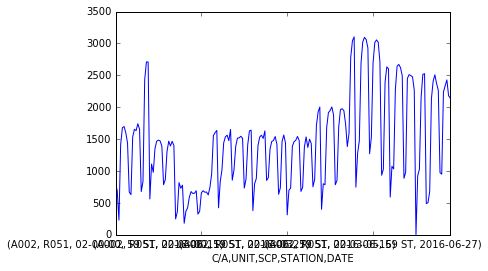

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df_ts.groupby(by=['C/A','UNIT','SCP','STATION','DATE'])['ENTRIES-COUNT'].sum()
#x.plot(kind='line')

x.loc[['A002','59 ST']].plot(kind='line')



### Challenge 5: Counts/Day from Single Turnstile
So far we've been operating on a single turnstile level, let's
combine turnstiles in the same ControlArea/Unit/Station combo. There
are some ControlArea/Unit/Station groups that have a single
turnstile, but most have multiple turnstilea-- same value for the
C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.


In [139]:
x = df_ts.groupby(by=['C/A','UNIT','STATION','DATE'])['ENTRIES-COUNT'].sum()
x[0:10]

C/A   UNIT  STATION  DATE      
A002  R051  59 ST    2016-06-11     7839
                     2016-06-12     8970
                     2016-06-13    16726
                     2016-06-14    18357
                     2016-06-15    18444
                     2016-06-16     4086
                     2016-06-18     7465
                     2016-06-19     8240
                     2016-06-20    16380
                     2016-06-21    18349
Name: ENTRIES-COUNT, dtype: float64

### Challenge 6:  All Turnstiles for each Station
Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.

In [150]:
x = df_ts.groupby(by=['C/A','STATION','DATE'])['ENTRIES-COUNT'].sum()
x.loc[['A002','59 ST']]

C/A   STATION  DATE      
A002  59 ST    2016-06-11     7839
               2016-06-12     8970
               2016-06-13    16726
               2016-06-14    18357
               2016-06-15    18444
               2016-06-16     4086
               2016-06-18     7465
               2016-06-19     8240
               2016-06-20    16380
               2016-06-21    18349
               2016-06-22    18662
               2016-06-23    18310
               2016-06-24    17850
               2016-06-25     8084
               2016-06-26     8827
               2016-06-27    16670
               2016-06-28    18153
               2016-06-29    18022
               2016-06-30    18088
               2016-07-01    16908
Name: ENTRIES-COUNT, dtype: float64


### Challenge 7: Plot Time Series for Each Station

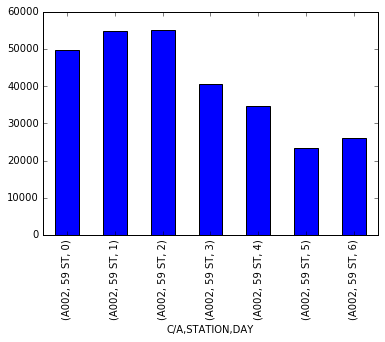

In [160]:
x.loc[['A002','59 ST']].plot(kind="bar")

### Challenge 8:  
- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.


In [162]:
df_ts.head()

,C/A,UNIT,SCP,STATION,ENTRIES,ENTRIES-COUNT,DATE-TIME,TIME-DELTA,DATE,DAY
2,A002,R051,02-00-00,59 ST,5703487,22,2016-06-11 08:00:00,NaT,2016-06-11,5
3,A002,R051,02-00-00,59 ST,5703589,102,2016-06-11 12:00:00,04:00:00,2016-06-11,5
4,A002,R051,02-00-00,59 ST,5703880,291,2016-06-11 16:00:00,04:00:00,2016-06-11,5
5,A002,R051,02-00-00,59 ST,5704266,386,2016-06-11 20:00:00,04:00:00,2016-06-11,5
6,A002,R051,02-00-00,59 ST,5704439,173,2016-06-12 00:00:00,04:00:00,2016-06-12,6


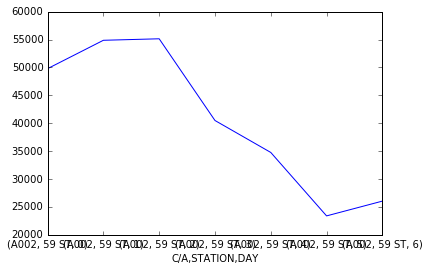

In [161]:
df_ts['DAY'] = df_ts['DATE-TIME'].dt.weekday
x = df_ts.groupby(by=['C/A','STATION','DAY'])['ENTRIES-COUNT'].sum()
x.loc[['A002','59 ST']].plot(kind='line')

### Challenge 9: Sum Total By Station
- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate

In [168]:
x = df_ts.groupby(by=['STATION'])['ENTRIES-COUNT'].sum()
x

STATION
1 AV                418326
103 ST              606359
103 ST-CORONA       377488
104 ST               66428
110 ST              235121
111 ST              304118
116 ST              665662
116 ST-COLUMBIA     247873
121 ST               47095
125 ST             1365956
135 ST              377458
137 ST CITY COL     272130
138/GRAND CONC       62774
14 ST              1090402
14 ST-UNION SQ     1795765
145 ST              686976
149/GRAND CONC      224187
14TH STREET         175356
15 ST-PROSPECT      116864
155 ST              129647
157 ST              186492
161/YANKEE STAD     533332
163 ST-AMSTERDM      86563
167 ST              376340
168 ST              457069
169 ST              156622
170 ST              307814
174 ST              113999
174-175 STS         103724
175 ST              255062
                    ...   
SUTPHIN-ARCHER      465534
SUTTER AV            84763
SUTTER AV-RUTLD     159143
THIRTY ST           188531
THIRTY THIRD ST     427179
TIMES SQ-42 ST     1

### Challenge 10
 Make a single list of these total ridership values and plot it with
```
plt.hist(total_ridership_counts)
```
To get an idea about the distribution of total ridership among
different stations. This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

(array([ 271.,   64.,   17.,    7.,    5.,    2.,    5.,    1.,    0.,    1.]),
 array([  3.40000000e+01,   2.84984400e+05,   5.69934800e+05,
          8.54885200e+05,   1.13983560e+06,   1.42478600e+06,
          1.70973640e+06,   1.99468680e+06,   2.27963720e+06,
          2.56458760e+06,   2.84953800e+06]),
 <a list of 10 Patch objects>)

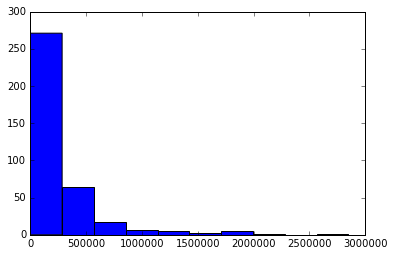

In [169]:
plt.hist(x)